In [44]:
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#Load the data
train_in=[]
test_in=[]
train_out=[]
test_out=[]

with open('train_in - Copy.csv') as file:
    read=csv.reader(file)
    for row in read:
        train_in.append(row)
train_in=np.array(train_in, dtype=float)


with open('train_out - Copy.csv') as file:
    read=csv.reader(file)
    for row in read:
        train_out.append(row[0])
train_out=np.array(train_out, dtype=int) 

with open('test_in - Copy.csv') as file:
    read=csv.reader(file)
    for row in read:
        test_in.append(row)
test_in=np.array(test_in, dtype=float)


with open('test_out - Copy.csv') as file:
    read=csv.reader(file)
    for row in read:
        test_out.append(row[0])
test_out=np.array(test_out, dtype=int) 


In [45]:
# KNN classifier
knn=KNeighborsClassifier()
knn.fit(train_in, train_out)

# KNN classifier for training set
knn_train_out=knn.predict(train_in)
con_ma_train=confusion_matrix(train_out, knn_train_out)#confusion_matrix for training set
Overall_accuracy_train=np.trace(con_ma_train/len(train_in))#total accuracy for the training set
accuracy_train=con_ma_train.diagonal()/con_ma_train.sum(axis=1)#accuracy in each digits for the training set

Least_acc_train=np.where(accuracy_train==np.min(accuracy_train))#most difficult to classify correctly for training set

acc_ma_train=con_ma_train/con_ma_train.sum(axis=1)
error_matrix_train=np.triu(acc_ma_train, k=1)+np.tril(acc_ma_train, k=-1).T#Sum up the (i,j) and (j,i) elements in accuracy_train (trace not included)
error_ratio_train=np.max(error_matrix_train)
error_pair_train=np.where(error_matrix_train==error_ratio_train)

print(con_ma_train)
print(Overall_accuracy_train)#total accuracy for the training set
print(accuracy_train)#accuracy in each digits for the training set
print(Least_acc_train)#most difficult to classify correctly
print(error_pair_train)#most common mistaken pair for Nearest mean classifier in the training set

[[318   0   1   0   0   0   0   0   0   0]
 [  0 252   0   0   0   0   0   0   0   0]
 [  2   4 189   1   1   0   0   4   0   1]
 [  2   0   0 128   0   0   0   0   1   0]
 [  0   4   0   0 114   0   0   0   0   4]
 [  3   0   1   1   1  80   1   0   0   1]
 [  1   1   1   0   0   0 148   0   0   0]
 [  0   3   0   0   0   0   0 162   0   1]
 [  2   3   0   5   2   0   0   1 129   2]
 [  1   0   0   0   0   0   0   2   0 129]]
0.9660222612770942
[0.9968652  1.         0.93564356 0.97709924 0.93442623 0.90909091
 0.98013245 0.97590361 0.89583333 0.97727273]
(array([8]),)
(array([3]), array([8]))


In [46]:
# KNN classifier for test set
knn_test_out=knn.predict(test_in)
con_ma_test=confusion_matrix(test_out, knn_test_out)#confusion_matrix for test set
Overall_accuracy_test=np.trace(con_ma_test/len(test_in))
accuracy_test=con_ma_test.diagonal()/con_ma_test.sum(axis=1)

Least_acc_test=np.where(accuracy_test==np.min(accuracy_test))#most difficult to classify correctly for test set

acc_ma_test=con_ma_test/con_ma_test.sum(axis=1)
error_matrix_test=np.triu(acc_ma_train, k=1)+np.tril(acc_ma_train, k=-1).T#Sum up the (i,j) and (j,i) elements in accuracy_test (trace not included)
error_ratio_test=np.max(error_matrix_test)
error_pair_test=np.where(error_matrix_test==error_ratio_test)
print(con_ma_test)
print(Overall_accuracy_test)#total accuracy for the test set
print(accuracy_test)#accuracy in each digits for the test set
print(Least_acc_test)#most difficult to classify correctly
print(error_pair_test)#most common mistaken pair for Nearest mean classifier in the test set

[[219   0   2   0   1   0   1   0   0   1]
 [  0 119   0   0   0   0   2   0   0   0]
 [  7   2  84   1   0   0   1   3   3   0]
 [  3   0   2  70   0   2   0   0   0   2]
 [  0   2   2   0  79   0   0   1   0   2]
 [  7   1   0   8   1  35   0   0   0   3]
 [  3   1   0   0   1   0  85   0   0   0]
 [  0   4   0   1   2   0   0  56   0   1]
 [  2   2   0   5   0   0   1   1  79   2]
 [  1   0   0   0   0   0   0   4   1  82]]
0.9079999999999999
[0.97767857 0.98347107 0.83168317 0.88607595 0.91860465 0.63636364
 0.94444444 0.875      0.85869565 0.93181818]
(array([5]),)
(array([3]), array([8]))


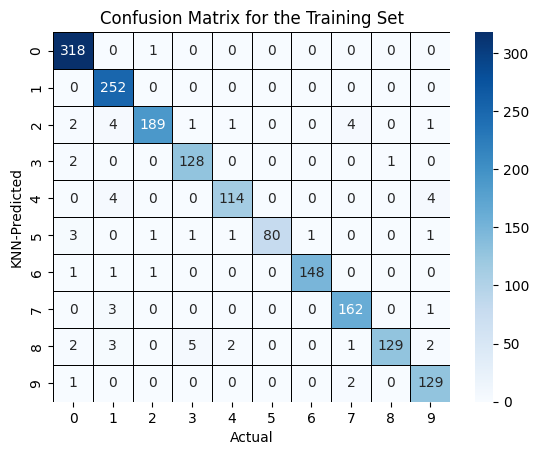

In [47]:
plt.figure()
sns.heatmap(con_ma_train, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10), linewidths=0.5, linecolor='black')
plt.xlabel('Actual')
plt.ylabel('KNN-Predicted')
plt.title('Confusion Matrix for the Training Set')
plt.show()

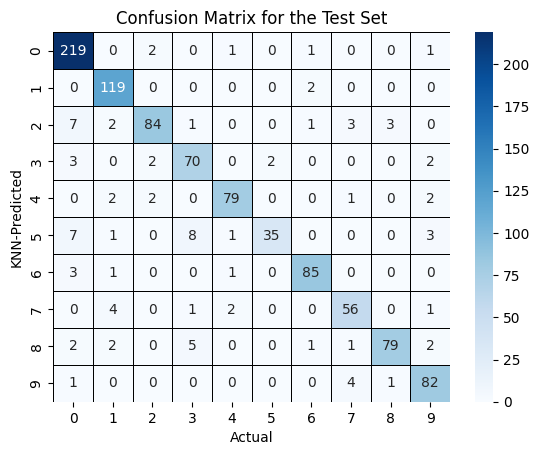

In [48]:
plt.figure()
sns.heatmap(con_ma_test, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10), linewidths=0.5, linecolor='black')
plt.xlabel('Actual')
plt.ylabel('KNN-Predicted')
plt.title('Confusion Matrix for the Test Set')
plt.show()